In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings as w

In [ ]:
df= pd.read_csv(r"C:\Users\diyaa\Downloads\sugarcane\List of Countries by Sugarcane Production.csv")

In [ ]:
df.head()

In [ ]:
df.shape

# Data Cleaning

In [ ]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace(".","").str.replace(".","")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")



In [ ]:

df.head()


In [ ]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"},inplace=True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_Person(Kg)"},inplace=True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"},inplace=True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"},inplace=True)


In [ ]:
df.head()


In [ ]:
df.isna().sum()

In [ ]:
df[df["Acreage(Hectare)"].isnull()]

In [ ]:
df=df.dropna().reset_index()  #reset because or else 99 gets removed

In [ ]:
df.head()

In [ ]:
df.drop(['index'], axis=1,inplace=True)

In [ ]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()

In [ ]:
df.dtypes

In [ ]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.nunique()

# Univariate Analysis

In [36]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# How many countries produce sugarcane from each continent?

In [37]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

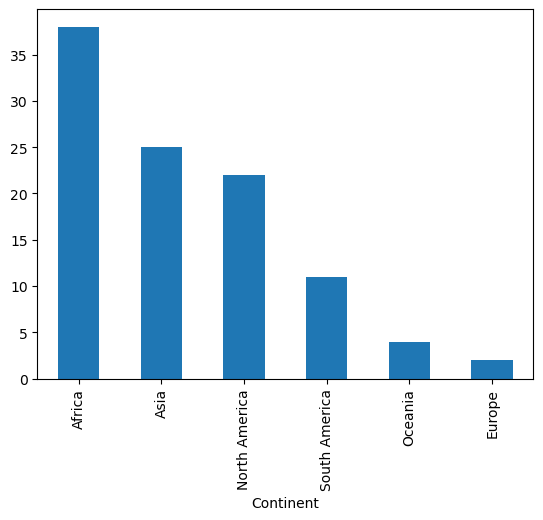

In [38]:
df["Continent"].value_counts().plot(kind="bar")

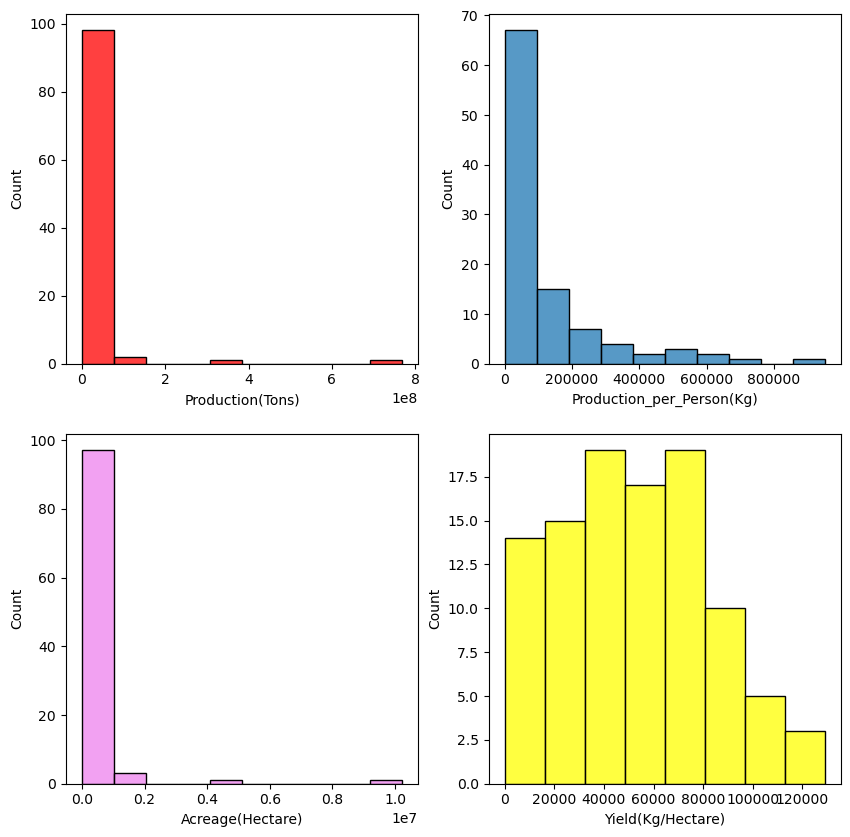

In [39]:

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.histplot(df['Production(Tons)'],bins=10,color='red')
plt.subplot(2,2,2)
sns.histplot(df['Production_per_Person(Kg)'],bins=10)
plt.subplot(2,2,3)
sns.histplot(df['Acreage(Hectare)'],bins=10,color='violet')
plt.subplot(2,2,4)
sns.histplot(df['Yield(Kg/Hectare)'],color='yellow')


w.simplefilter("ignore")
#ignore warning


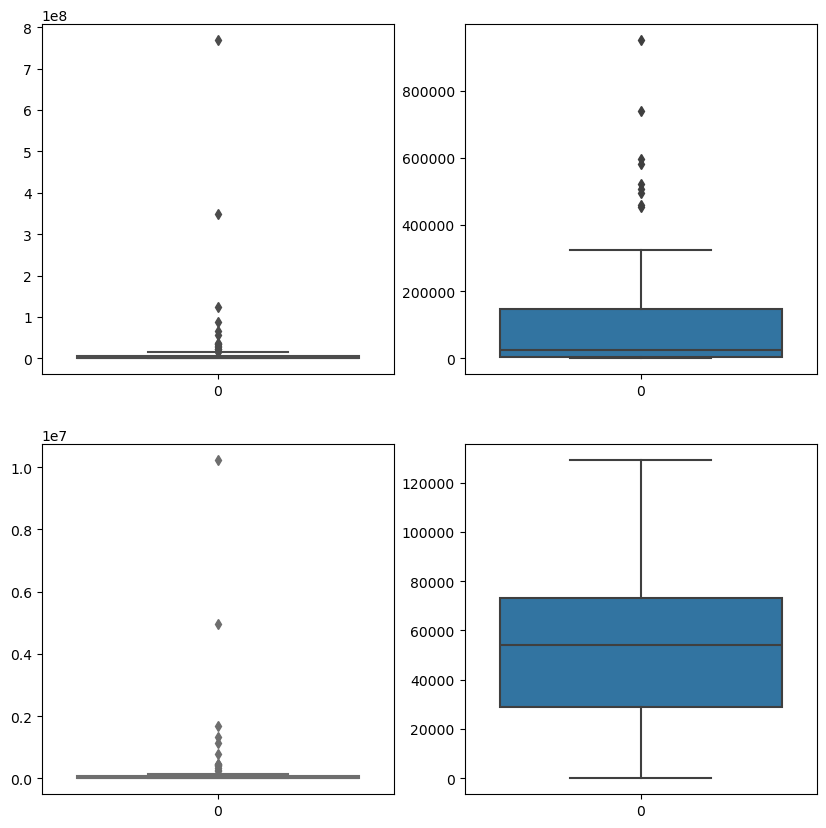

In [40]:


plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'],color='red')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'],color='violet')
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])


w.simplefilter("ignore")
#ignore warning


# Bivariate Analysis

In [41]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [42]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [43]:
df_new["Production(Tons)_percent"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [44]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


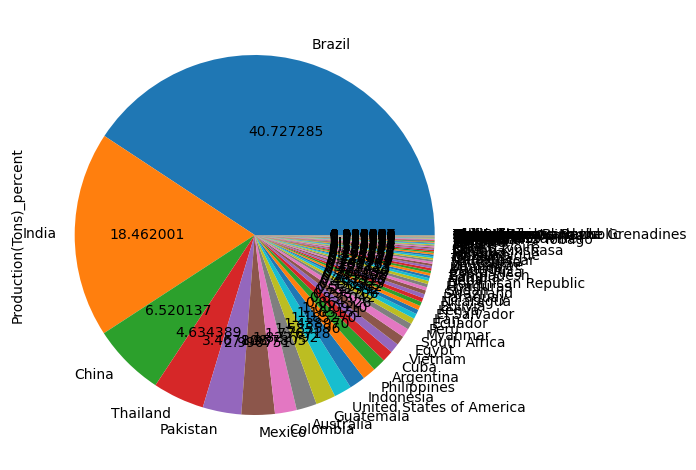

In [45]:
df_new["Production(Tons)_percent"].plot(kind="pie",autopct="%2f")
plt.tight_layout()



# Top 10

<Axes: xlabel='Country'>

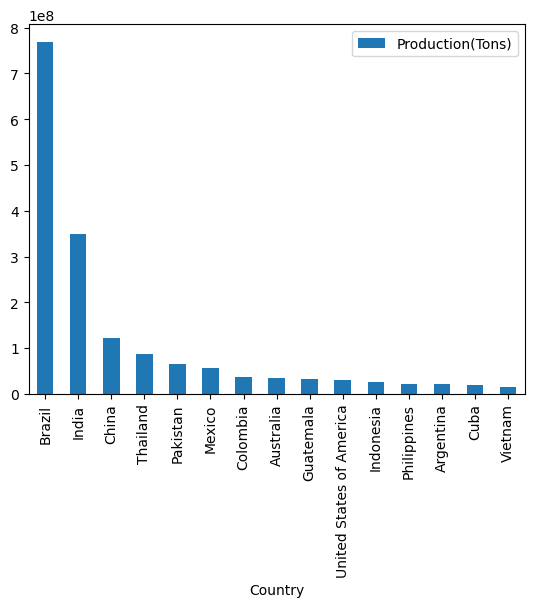

In [46]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

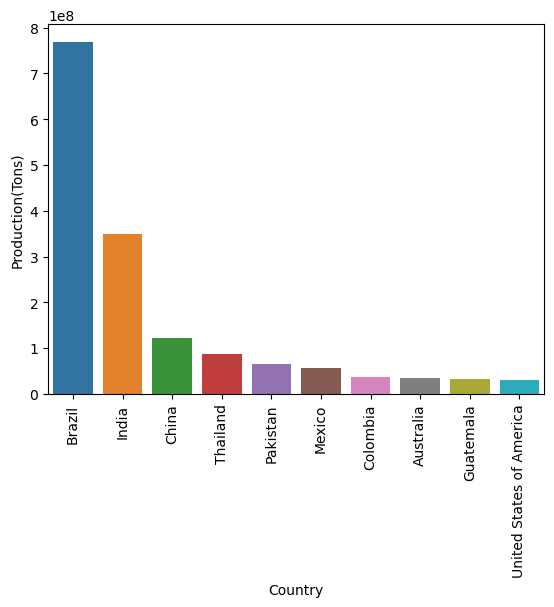

In [47]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)") #using seaborn same as above
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #prevent overlapping in x-axis
plt.show()

# Which country has highest land?

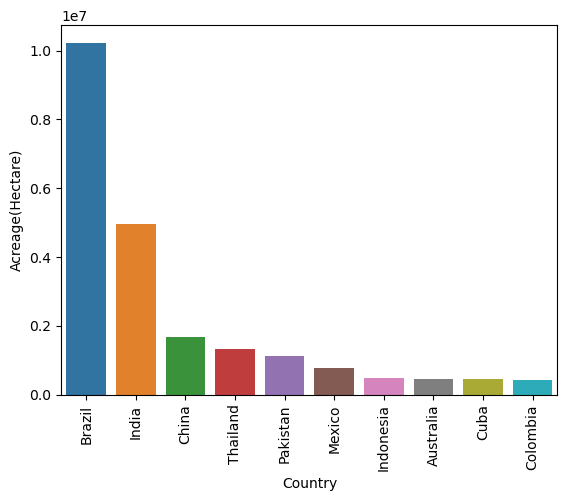

In [48]:
df_acr=df.sort_values(["Acreage(Hectare)"],ascending=False) # so that top 10 countries given not top 10 rows
ax=sns.barplot(data=df_acr.head(10),x="Country",y="Acreage(Hectare)") #using seaborn for colourful
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #prevent overlapping in x-axis
plt.show()

# Which Country has highest yield per hectare?

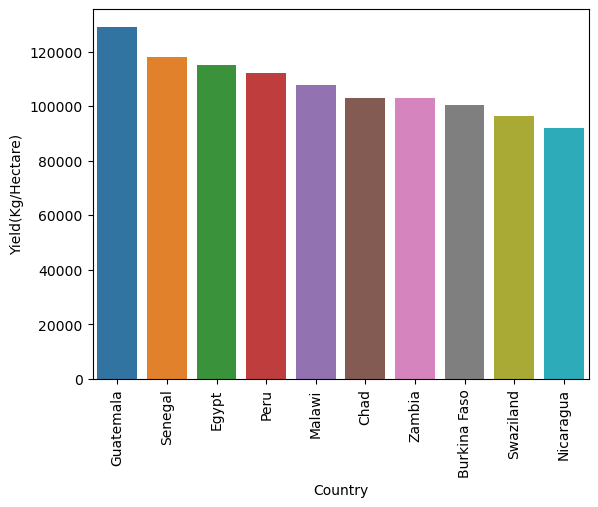

In [49]:
df_yield=df.sort_values(["Yield(Kg/Hectare)"],ascending=False) # so that top 10 countries given not top 10 rows
ax=sns.barplot(data=df_yield.head(10),x="Country",y="Yield(Kg/Hectare)") #using seaborn for colourful
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #prevent overlapping in x-axis
plt.show()

# Which Country has highest yield per hectare?

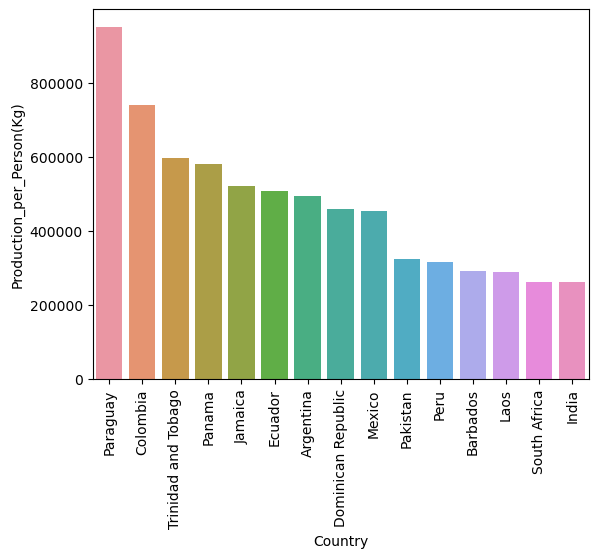

In [50]:
df_yield = df.sort_values("Production_per_Person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

# Corelation

In [67]:

df[['Production(Tons)',"Production_per_Person(Kg)","Acreage(Hectare)","Yield(Kg/Hectare)"]].corr()



,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

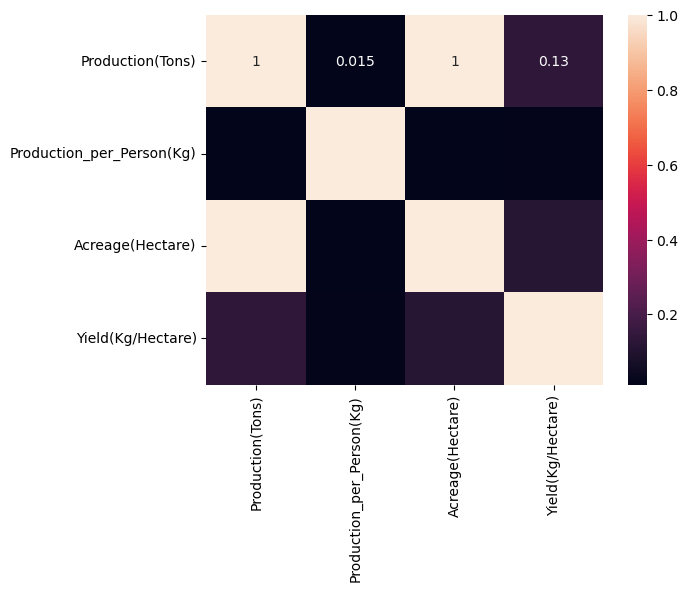

In [70]:
sns.heatmap(df[["Production(Tons)","Production_per_Person(Kg)","Acreage(Hectare)","Yield(Kg/Hectare)"]].corr(),annot=True) #version issue

# Do countries with highest land produce more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

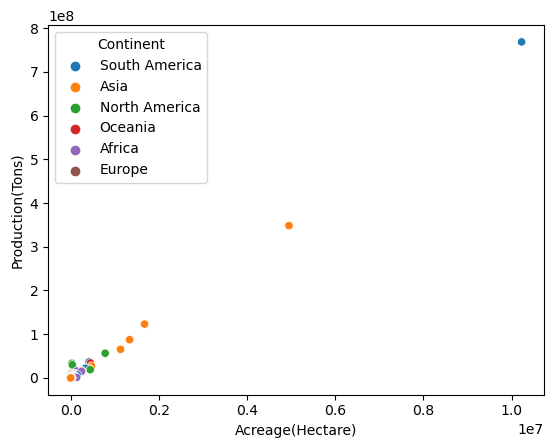

In [76]:
sns.scatterplot(data=df,x ='Acreage(Hectare)',y='Production(Tons)',hue='Continent')

# Do countries which yield more sugarcane per hectare prodcue more sugarcane?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

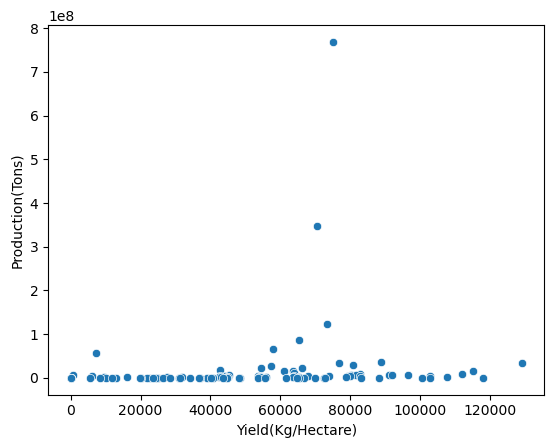

In [77]:
sns.scatterplot(data=df,x ='Yield(Kg/Hectare)',y='Production(Tons)')

## No relation at all all staright

# Analysis For Continent

In [79]:
df_continent=df.groupby('Continent').sum()

In [89]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


# Which Continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

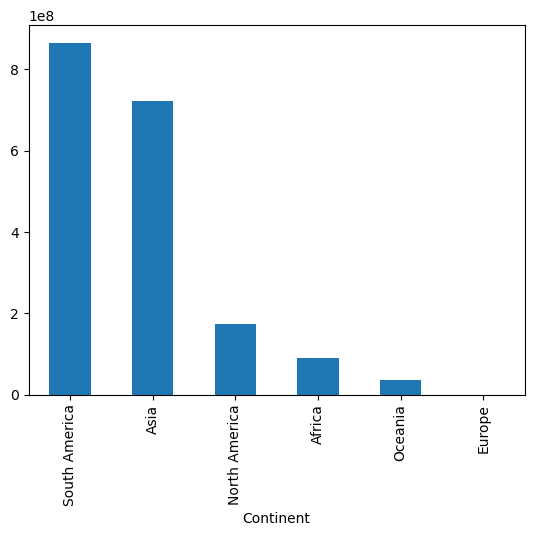

In [101]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind="bar")

In [105]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

### Africa has more countries but 4th in production so more number of country does not result in more sugarcane production

# Do Number of Countries in a continent effect production of Sugarcane?

In [107]:
df_continent['Num_of_countries']=df.groupby('Continent').count()['Country']

In [108]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Num_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


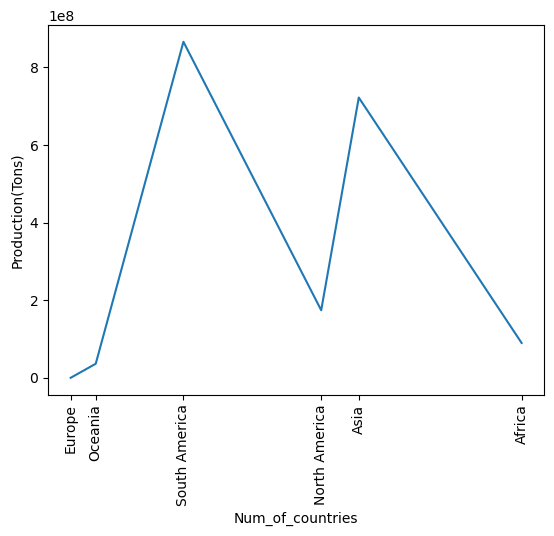

In [114]:
continent_names=df_continent.index.to_list() #to avoid error of x='country' like earlier because here continent=index not column

sns.lineplot(data=df_continent,x='Num_of_countries',y='Production(Tons)') #no versus production
plt.xticks(df_continent['Num_of_countries'],continent_names,rotation=90)
plt.show()

w.simplefilter('ignore')

# Production Distribution By Continent

<Axes: ylabel='Production(Tons)'>

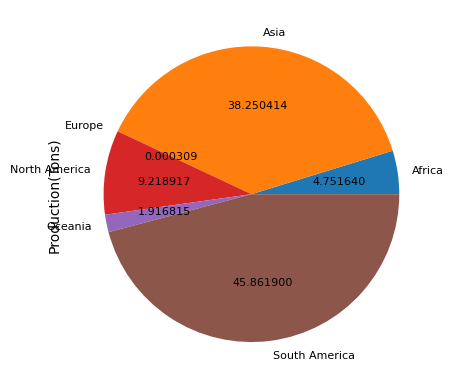

In [120]:
df_continent['Production(Tons)'].plot(kind="pie",autopct="%2f",fontsize="8")


In [115]:
df_continent[['Production(Tons)',"Production_per_Person(Kg)","Acreage(Hectare)","Yield(Kg/Hectare)","Num_of_countries"]].corr()



,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Num_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Num_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
